## Python Pandas Practice
![alt text](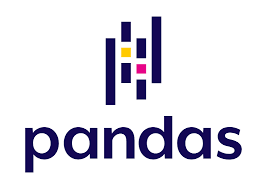 "Title")

In [32]:
import pandas as pd

In [33]:
## Reading data 
DATA_URL = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

In [34]:
## Reading dataset
def loadTitanicData(DATA_URL):
    data = pd.read_csv(DATA_URL)
    return data
dataset = loadTitanicData(DATA_URL)

In [35]:
## getting first 5 rows
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [36]:
## shape of the dataset
dataset.shape

(891, 12)

From the output, we can see that the data contains 891 rows and 12 columns

In [37]:
## getting name of the columns
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
## getting general info about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
## get statistical perspective of numerical features of our dataset
dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

The above output shows statistical characteristics of each numerical features

In [40]:
## statistical features of non-numerical features
dataset.describe(include=["object", "bool"])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [41]:
## male and female counts
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
## Fractional count
round(dataset['Sex'].value_counts(normalize=True), 2)

male      0.65
female    0.35
Name: Sex, dtype: float64

In [43]:
def survivalCount(sex):
    return dataset[(dataset['Sex'] == sex ) & (dataset['Survived'] == 1)]['Sex'].value_counts()

In [44]:
## No. of females who survived
survivalCount("female")

female    233
Name: Sex, dtype: int64

In [45]:
## No. of males who survived
survivalCount("male")

male    109
Name: Sex, dtype: int64

- #### The loc method is used for indexing by name, while iloc() is used for indexing by number.

In [46]:
## subsetting using loc
dataset.loc[:, "Survived": "Age"].head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  
0    male  22.0  
1  female  38.0  
2  female  26.0  
3  female  35.0  
4    male  35.0

In [47]:
## subsetting using iloc
dataset.iloc[:, 1:5].head()

Survived  Pclass                                               Name     Sex
0         0       3                            Braund, Mr. Owen Harris    male
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female
2         1       3                             Heikkinen, Miss. Laina  female
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female
4         0       3                           Allen, Mr. William Henry    male

In [48]:
d = {0: False, 1:True}
dataset['Survived'] = dataset['Survived'].map(d)
dataset['Survived'].head()

0    False
1     True
2     True
3     True
4    False
Name: Survived, dtype: bool

In [ ]:
## using crosstab for summary
pd.crosstab(dataset['Survived'], dataset['Sex'])

Sex       female  male
Survived              
False         81   468
True         233   109